## How to Use RFE for Feature Selection
Recursive Feature Elimination or RFE is a popular feature selection algorithm. RFE is popular because it is easy to configure and use, and because it is effective at selecting those features (columns) in training dataset that are more or most relvant in predicting the target variable. there are two important configureation otpitons when using RFE: the choice in the number of features to select and the choice of the algorithm used to help choose features. Both of the hyperparameters can be explored, although the preformance of the methid is not strongly dependent on these hyperpararmeteres being configures well

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# Define the dataset
X, y = make_classification(n_samples= 1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#Create pipeline 
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 5)
model= DecisionTreeClassifier()
pipeline= Pipeline(steps=[('s', rfe), ('m',model)])
#evaluate the model
cv= RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores= cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=1)
# report performance
print(f"Accuracy: {np.mean(n_scores):.3f},{np.std(n_scores):.3f}")

Accuracy: 0.887,0.029


In [3]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# Define the dataset
X, y = make_classification(n_samples= 1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
#Create pipeline 
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select= 5)
model= DecisionTreeClassifier()
pipeline= Pipeline(steps=[('s', rfe), ('m',model)])
# fit the model
pipeline.fit(X,y)

data= [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
pred = pipeline.predict(data)
print(f'pridicted class: {pred}')

pridicted class: [1]


#### RFE for Regression

In [5]:
import numpy as np 
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

#Define Dataset
X,y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state =1)
# create a pipeline 
rfe = RFE(estimator= DecisionTreeRegressor(), n_features_to_select=5)
model= DecisionTreeRegressor()
pipeline= Pipeline(steps=[('s', rfe),('m',model)])

# Evaluate the model
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores= cross_val_score(pipeline, X, y , scoring='neg_mean_absolute_error', cv=cv, n_jobs =1)
print(f'MAE: {np.mean(n_scores):.3f} {np.std(n_scores):.3f}')

pipeline.fit(X,y)
data1= [[2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057, -2.48924933, -1.93094078, 3.26130366, 2.05692145]]
prd = pipeline.predict(data1)
print(f"Predicted: {prd}")

MAE: -26.913 2.785
Predicted: [-315.20952463]


### RFE Hyperparameters

#### Explore the Numbers of Features

>2 0.713 0.043


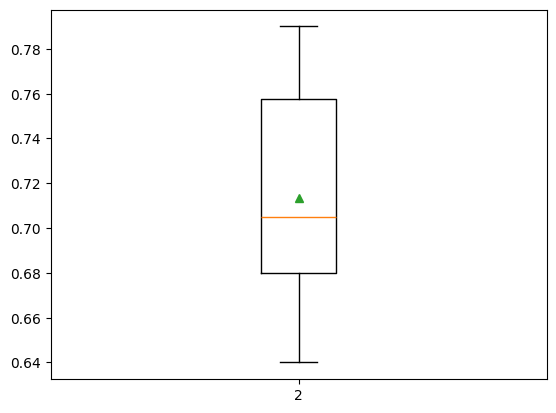

In [8]:
import numpy as np 
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# define dataset
def get_dataset():
    X, y = make_classification(n_samples =1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
    return X,y

# get a list of models to evaluate 
def get_models():
    models = dict()
    for i in range(2,10):
        rfe = RFE(estimator= DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s', rfe), ('m', model)])
        return models

#evaluate a given model using cross validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats=3, random_state=1)
    scores= cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs = -1)
    return scores

X, y= get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores= evaluate_model(model, X,y)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} {np.std(scores):.3f}")

plt.boxplot(results, tick_labels=names, showmeans= True)
plt.show()

>2 features: 0.716 ± 0.047
>3 features: 0.825 ± 0.035
>4 features: 0.877 ± 0.032
>5 features: 0.885 ± 0.029
>6 features: 0.887 ± 0.031
>7 features: 0.889 ± 0.031
>8 features: 0.891 ± 0.026
>9 features: 0.886 ± 0.026


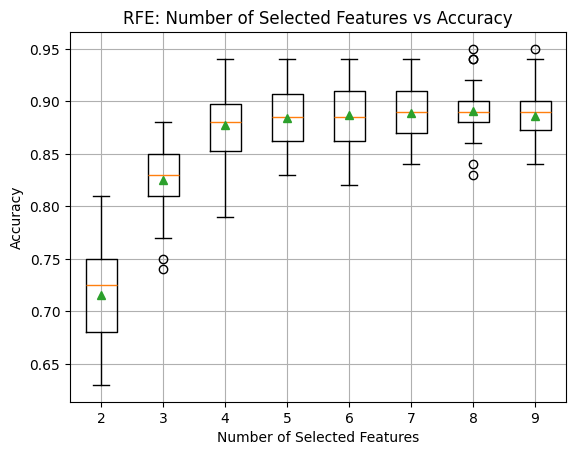

In [9]:
from numpy import mean, std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# Get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
                               n_redundant=5, random_state=1)
    return X, y

# Get a list of models to evaluate with different number of selected features
def get_models():
    models = dict()
    for i in range(2, 10):  # Try selecting 2 to 9 features
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = Pipeline(steps=[('rfe', rfe), ('dt', DecisionTreeClassifier())])
        models[str(i)] = model  # Use number of features as the key (as a string)
    return models

# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# Run everything
X, y = get_dataset()
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f">{name} features: {mean(scores):.3f} ± {std(scores):.3f}")

# Plot model performance for comparison
pyplot.boxplot(results, tick_labels=names, showmeans=True)
pyplot.title("RFE: Number of Selected Features vs Accuracy")
pyplot.xlabel("Number of Selected Features")
pyplot.ylabel("Accuracy")
pyplot.grid(True)
pyplot.show()

#### Automatically Select the Number of Features
We can automatically select the number of features chosen by RFE. This can be achieved by performing cross-validation evaluation of different numbers of features as we did in the previous section and automatically selecting the number of features that resulted in the best mean score. The RFECV class implements this.

The RFECV is configured just like the RFE class regarding the choice of the algorithm that is wrapped. Additionally, the minimum number of features to be considered can be specified via the min_features_to_select argument (defaults to 1) and we can also specify the type of cross validation and scoring to use via the cv(default to 5) and scoring arguments (uses accuracy for classification)

In [11]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

X, y = make_classification(n_samples= 1000, n_features= 10, n_informative =5, n_redundant= 5, random_state= 1)

rfe = RFECV(estimator= DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline= Pipeline(steps=[('s', rfe), ('m', model)])

# Evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=1)
print(f"Accuracy: {np.mean(n_scores):.3f}({np.std(n_scores):.3f})")

Accuracy: 0.887(0.029)


#### Which features were selected
while using RFE you may be interested in that which of the features were selected and which of them were removed. This can be achived by reviewing the attributes of the fit RFE object. The support_ attributes reports ture or false as to which features on order of column index were included and the ranking_ attribue reports the relative ranking of features in the same oreder. The example beow fits an RFE model on the whole dataset and select five features then reports each feature column index (0 to 9), whether it was selected or not(True or Flase), and the relative feature eanking

In [13]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

# define the dataset
X, y = make_classification(n_samples = 1000, n_features= 10, n_informative = 5, n_redundant = 5, random_state= 1)

# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select = 5)
rfe.fit(X, y)
for i in range(X.shape[1]):
    print(f"Cloumn: {i}, Selected= {rfe.support_[i]}, Rank:{rfe.ranking_[i]}")


Cloumn: 0, Selected= False, Rank:4
Cloumn: 1, Selected= False, Rank:6
Cloumn: 2, Selected= True, Rank:1
Cloumn: 3, Selected= True, Rank:1
Cloumn: 4, Selected= True, Rank:1
Cloumn: 5, Selected= False, Rank:5
Cloumn: 6, Selected= True, Rank:1
Cloumn: 7, Selected= False, Rank:2
Cloumn: 8, Selected= True, Rank:1
Cloumn: 9, Selected= False, Rank:3


#### Explore the Algorithms
There are many algorithms that can be used in the core RFE, as long as they provide some indication of variable importance. Most decision tree algorithms are likely to report the same general trends in feature importance, but this is not guaranteed. It might be helpful to explore the use of different algorithms wrapped by RFE. The example below demonstrates how you might explore this configuration option.

>lr 0.8933, 0.0337
>per 0.8490, 0.0411
>cart 0.8810, 0.0365
>rf 0.8483, 0.0382
>gbm 0.8910, 0.0306


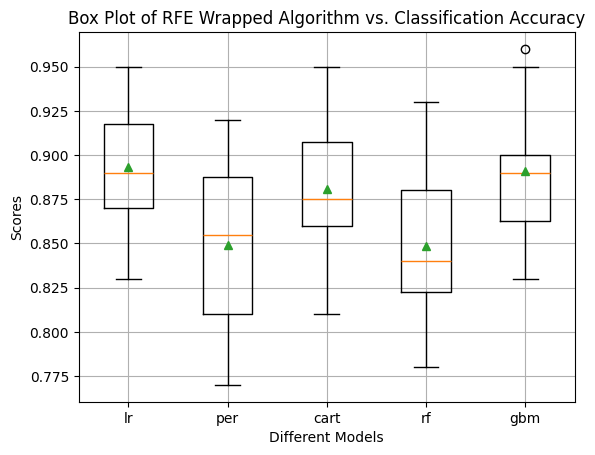

In [15]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def get_dataset():
    X, y = make_classification(n_samples= 1000, n_features=10, n_informative= 5 , n_redundant= 5, random_state=1)
    return X, y

#get a list of model to evaluate
def get_models():
    models= dict()
    #lr
    rfe = RFE(estimator= LogisticRegression(), n_features_to_select= 5)
    model =DecisionTreeClassifier()
    models['lr']= Pipeline(steps=[('s',rfe),('m', model)])
    #perceptron
    rfe = RFE(estimator= Perceptron(), n_features_to_select= 5)
    model= DecisionTreeClassifier()
    models['per']= Pipeline(steps=[('s',rfe),('m',model)])
    #cart
    rfe = RFE(estimator= DecisionTreeClassifier(), n_features_to_select= 5)
    model =DecisionTreeClassifier()
    models['cart']= Pipeline(steps=[('s',rfe),('m', model)])
    #rf
    rfe = RFE(estimator= RandomForestClassifier(), n_features_to_select= 5)
    model =DecisionTreeClassifier()
    models['rf']= Pipeline(steps=[('s',rfe),('m', model)])
    #gbm
    rfe = RFE(estimator= GradientBoostingClassifier(), n_features_to_select= 5)
    model =DecisionTreeClassifier()
    models['gbm']= Pipeline(steps=[('s',rfe),('m', model)])
    return models

def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits =10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=1)
    return scores

#define dataset
X, y = get_dataset()

models = get_models()
#evaluate the model and store the results
results , names = list(), list()
for name, model in models.items():
    scores= evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.4f}, {np.std(scores):.4f}")

plt.boxplot(results , tick_labels= names, showmeans=True)
plt.title('Box Plot of RFE Wrapped Algorithm vs. Classification Accuracy')
plt.xlabel('Different Models')
plt.ylabel('Scores')
plt.grid(True)
plt.show()